# Поглядим на мемы поближе
<img align='center' src='Pictures/doge.png'>

In [1]:
# Obvious reason
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# Image grabbing and showing
import requests
import matplotlib.image as mpimg

# Dates
from datetime import datetime

## Подготовка
Создадим датафрейм ```memes``` и, на всякий случай, удалим все дубликаты.

In [2]:
memes = pd.read_csv('data/data.csv')
memes = memes.drop_duplicates(subset='name', keep='first')
memes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23813 entries, 0 to 23869
Data columns (total 18 columns):
name          23812 non-null object
category      23812 non-null object
status        23812 non-null object
year          23812 non-null object
added         23804 non-null object
updated       23380 non-null object
views         23813 non-null int64
videos        23813 non-null int64
photos        23813 non-null int64
comments      23813 non-null int64
tags          23810 non-null object
type          11230 non-null object
about         21512 non-null object
history       14717 non-null object
other         14594 non-null object
origin        23807 non-null object
picture       23812 non-null object
scraped_at    23813 non-null object
dtypes: int64(4), object(14)
memory usage: 3.5+ MB


Заполним все NaN в столбцах ```added``` ```updated``` с помощью forward-fill. После того, как у нас нет NaT, конвертируем все столбцы с датами в UTC. А затем установим ```added``` как индекс.

In [3]:
memes.added.fillna(method='ffill', inplace=True)
memes.updated.fillna(method='ffill', inplace=True)
memes['added'] = pd.to_datetime(memes.added, utc=True)
memes['updated'] = pd.to_datetime(memes.updated, utc=True)
memes['scraped_at'] = pd.to_datetime(memes.scraped_at, utc=True)
memes.set_index('added', inplace=True)
memes.index

DatetimeIndex(['2020-01-02 23:31:57+00:00', '2020-01-02 22:07:28+00:00',
               '2020-01-02 21:31:25+00:00', '2020-01-02 21:09:31+00:00',
               '2020-01-02 20:50:43+00:00', '2020-01-02 20:10:23+00:00',
               '2020-01-02 20:10:09+00:00', '2020-01-02 19:38:22+00:00',
               '2020-01-02 19:38:16+00:00', '2020-01-02 18:28:50+00:00',
               ...
               '2008-12-12 20:11:32+00:00', '2008-12-12 20:11:00+00:00',
               '2008-12-12 20:10:42+00:00', '2008-12-12 20:10:28+00:00',
               '2008-12-12 20:10:09+00:00', '2008-12-10 21:09:26+00:00',
               '2008-12-10 21:09:13+00:00', '2008-12-10 21:08:49+00:00',
               '2008-12-10 21:08:39+00:00', '2008-12-10 21:08:04+00:00'],
              dtype='datetime64[ns, UTC]', name='added', length=23813, freq=None)

Опустим часовой пояс у индекса.

In [4]:
memes = memes.tz_convert(None)
memes.index

DatetimeIndex(['2020-01-02 23:31:57', '2020-01-02 22:07:28',
               '2020-01-02 21:31:25', '2020-01-02 21:09:31',
               '2020-01-02 20:50:43', '2020-01-02 20:10:23',
               '2020-01-02 20:10:09', '2020-01-02 19:38:22',
               '2020-01-02 19:38:16', '2020-01-02 18:28:50',
               ...
               '2008-12-12 20:11:32', '2008-12-12 20:11:00',
               '2008-12-12 20:10:42', '2008-12-12 20:10:28',
               '2008-12-12 20:10:09', '2008-12-10 21:09:26',
               '2008-12-10 21:09:13', '2008-12-10 21:08:49',
               '2008-12-10 21:08:39', '2008-12-10 21:08:04'],
              dtype='datetime64[ns]', name='added', length=23813, freq=None)

Совместим приятное с полезным. Чтобы проверить, как теперь выглядит датафрейм, посмотрим на самые просматриваемые мемы

In [5]:
memes.sort_values('views', ascending=False).head()

,name,category,status,year,updated,views,videos,photos,comments,tags,type,about,history,other,origin,picture,scraped_at
added,,,,,,,,,,,,,,,,,
2010-01-03 06:39:46,Slender Man,meme,confirmed,2009,2019-09-01 13:56:09+00:00,14809004,146,683,671,"urban legend, arg, creepy, youtube series, 4ch...",character,Slender Man (a.k.a Slenderman) is a mythical c...,Slender Man (a.k.a Slenderman) is a mythical c...,"On June 8th, 2009, a ""'paranormal pictures"" ph...",something awful,https://i.kym-cdn.com/entries/icons/original/0...,2020-01-03 22:09:57.394083+00:00
2013-07-24 20:29:55,Doge,meme,confirmed,2013,2019-12-06 13:30:40+00:00,13122848,62,1666,918,"animal, dog, shiba inu, shibe, such doge, supe...",animal,"Doge is a slang term for ""dog"" that is primari...","The use of the misspelled word ""doge"" to refer...","On October 28th, 2010, a photo of Kabosu was s...",tumblr,https://i.kym-cdn.com/entries/icons/original/0...,2020-01-03 15:35:40.232899+00:00
2012-11-19 14:35:46,( ͡° ͜ʖ ͡°) / Lenny Face,meme,confirmed,2012,2018-09-27 19:53:47+00:00,12758696,43,171,423,"4chan, ( ͡° ͜ʖ ͡°), entry of november 2012, we...",emoticon,( ͡° ͜ʖ ͡°) is an emoticon created with unicod...,One of the earliest appearances of the emotico...,"By 11 a.m. (ET) that same day, the face had be...",ylilauta,https://i.kym-cdn.com/entries/icons/original/0...,2020-01-03 16:29:42.146761+00:00
2010-08-25 05:23:55,Forever Alone,meme,confirmed,2010,2019-10-16 21:56:39+00:00,12099827,50,1293,485,"rageguy spinoff, forever alone, 4chan, alone, ...",character,Forever Alone is an exploitable rage comic cha...,Forever Alone is considered one of the first m...,"In early June 2010, another instance featuring...",funnyjunk,https://i.kym-cdn.com/entries/icons/original/0...,2020-01-03 21:01:28.834052+00:00
2012-06-14 20:17:22,Navy Seal Copypasta,meme,confirmed,2010,2019-11-14 20:14:25+00:00,12094419,23,132,215,"lol, marine, catchphrase, copypasta, warfare, ...",copypasta,Navy Seal Copypasta (also known as the “Marine...,The copypasta is believed to have originated o...,"On April 4th, 2012, Redditor fahottie submitte...",operatorchan,https://i.kym-cdn.com/entries/icons/original/0...,2020-01-03 17:24:41.388740+00:00


## Распределение по категориям
Каждая спрасенная страница отнесена к какой-то категории. Построим круговую диаграмму, которая покажет отношение количества страниц в каждой категории.

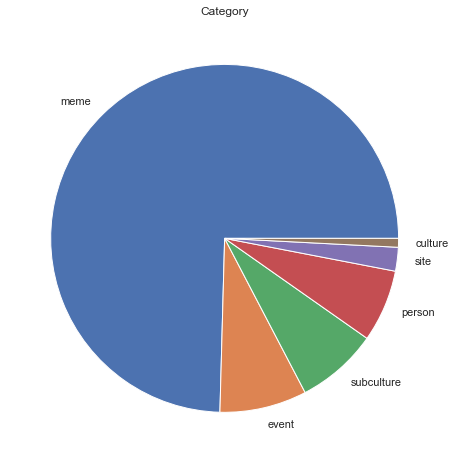

In [6]:
memes.category.value_counts().plot(kind='pie', title='Category', figsize=(8, 8))
plt.axis(False)
plt.show()

## Распределение по статусу
Каждая запись на сайте имеет один из трех статусов:
* **Confirmed** - скорее всего, популярный мем, подтвержденный администрацией
* **Submission** - недавно добавленный мем (или недостаточно популярный), не подтвержденный администрацией
* **Deadpool** - мемы, не удовлетворяющие необходимым критериям оформления страницы
Аналогично, построим круговую диаграмму, которая покажет распределение мемов по статусу.

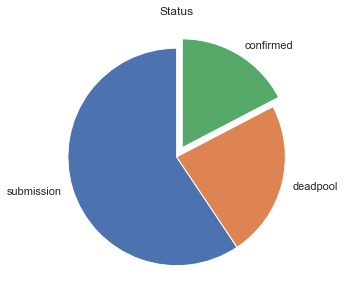

In [7]:
explode = (0, 0, 0.1)
memes.status.value_counts().plot(kind='pie', explode=explode, startangle=90, title='Status', figsize=(5, 5))
plt.axis(False)
plt.show()

## Типы
Столбец ```type``` также, как и ```category``` и ```status``` содержит лишь одно ключевое слово, однако, разных типов гораздо больше.

In [8]:
memes.type.nunique()

107

Интересно посмотреть на самый популярные типы среди каждой из категорий. Построим гистограммы десяти самых популярных типов в каждой категории.

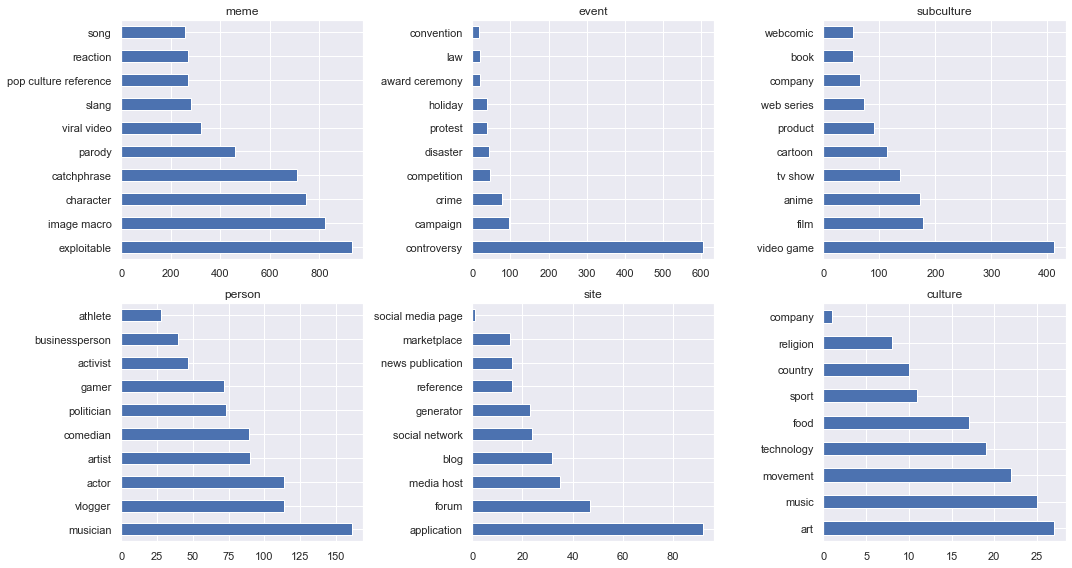

In [9]:
categories = memes.category.value_counts().index
fig, ax = plt.subplots(2, 3, figsize=(15, 8))
index = 0
for i in range(2):
    for j in range(3):
        plottable = memes[(memes.category == categories[index]) & (memes.type)].type
        plottable = plottable.value_counts().head(10)
        plottable.plot(kind='barh', title=categories[index], ax=ax[i, j])
        index += 1
plt.tight_layout()
plt.show()

Среди мемов самыми популярными стали __exploitable__ и __image macro__.  
__Exploitable__ - это обычно шаблонные пикчи, которые просто превратить в новый мем.  
<img align='center' src='Pictures/iamdisappoint.png'>  
__Image macro__ - картинки с любой подписью, будь то демотиваторы, современные постироничные "ты как из рубашки выбрался" или древние advice-animals.  
<img align='center' src='Pictures/isitmeme.jpg'>  
Также достаточно интересно, что среди страниц людей, страниц посвященных музыкантам почти вдвое больше, чем страниц, посвященных блоггерам.

## Количество загруженных мемов за каждый год
Сгруппируем мемы по годам и построим гистограмму.

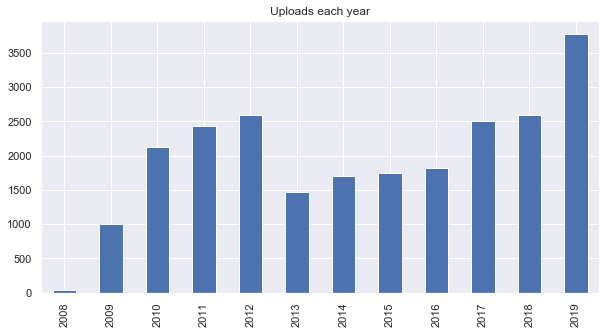

In [10]:
by_year = memes.groupby(memes.index.year).count()
by_year[by_year.index < 2020].name.plot(kind='bar', figsize=(10, 5))
plt.xlabel('')
plt.title('Uploads each year')
plt.show()

Судя по гистограмме, 2019 год получился самым "меметичным".

## В какие месяца загружают больше всего мемов?
Здесь я построю две диаграммы рядом. В одной будет абсолютное значение количества созданных страниц за каждый месяц, а в другой среднее значение созданных страниц каждый день в течение месяца.  
Учтем високосные года, установив количество дней в феврале 28.25. Не лучшее решение, зато просто...

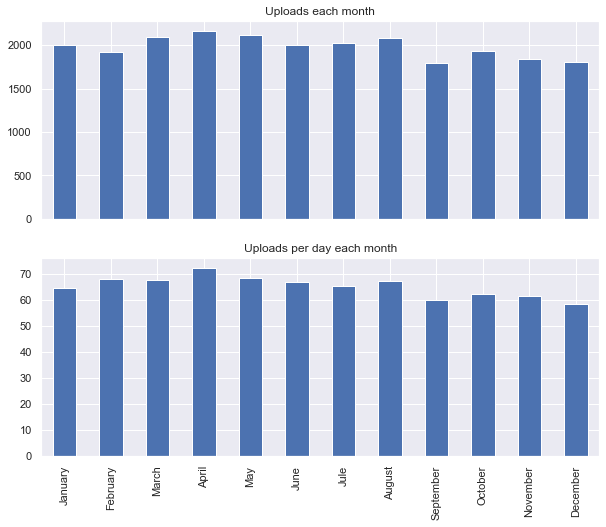

In [11]:
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'Jule', 'August', 'September', 'October', 'November', 'December']
days_in_month = np.array([31, 28.25, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])

by_month = memes.groupby(memes.index.month).count()
by_month = by_month.name

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 8))
by_month.plot(kind='bar', ax=ax[0], title='Uploads each month')
(by_month/days_in_month).plot(kind='bar', ax=ax[1], title='Uploads per day each month')
plt.xlabel('')
plt.xticks(np.arange(12), month_names)
plt.show()

Однако, из полученного графика мало чего можно сказать. Мемы распределены достаточно равномерно по всем месяцам.

## Загрузки по дням недели

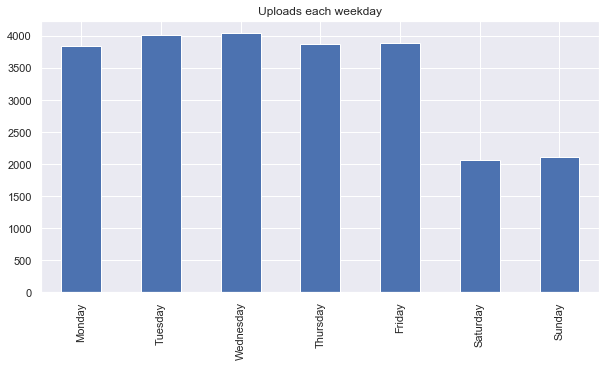

In [12]:
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
memes.groupby(memes.index.weekday).count().name.plot(kind='bar', figsize=(10, 5))
plt.title('Uploads each weekday')
plt.xlabel('')
plt.xticks(np.arange(7), weekday_names)
plt.show()

Это уже интересней. На выходных активность снижается почти в два раза. Причина мне, к сожалению, не ясна. Неужели люди действительно отдыхают или занимаются чем-то полезным?...

## Загрузки по часам
Посмотрим на то, во сколько люди обычно загружают мемы.

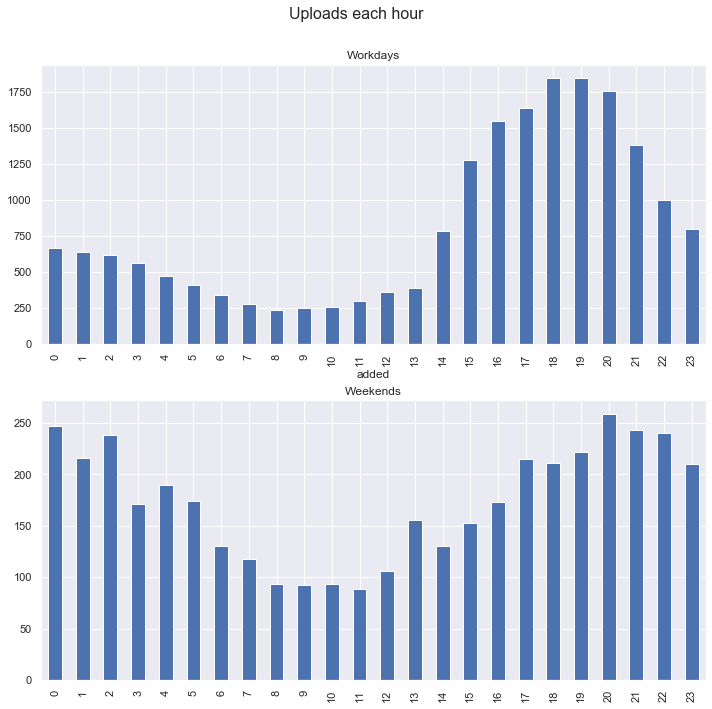

In [13]:
workdays = memes[memes.index.weekday.isin(range(5))]
weekends = memes[memes.index.weekday.isin(range(5, 7))]
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle('Uploads each hour', fontsize=16)
workdays.groupby(workdays.index.hour).count().name.plot(kind='bar', ax=ax[0])
ax[0].set_title('Workdays')
weekends.groupby(weekends.index.hour).count().name.plot(kind='bar', ax=ax[1])
ax[1].set_title('Weekends')
plt.xlabel('')
plt.tight_layout()
fig.subplots_adjust(top=0.9)
plt.show()

Красиво! И вполне ожидаемо.  
В будни минимум достигается в 7-9 часов, когда всем надо уже топать на работу или учебу, а пик активности под вечер - в 19 часов.  
В выходные же, распределение куда более равномерное. Люди чаще сидят за компьютером допоздна. Настолько, что количество созданных страниц в 20 и 00 практически одинаково.

## Год появления
"Опишем" стобец, хранящий год появляения мема. Поскольку столбец имеет NaN значения, а также значения с 'Unknown', отнесем все NaN к 'Unknown'.

In [14]:
memes.year.fillna('Unknown', inplace=True)
years = memes.year[memes.year.str.isdigit()].map(int)
years.describe()

count    21974.000000
mean      2008.876536
std         31.168080
min       1000.000000
25%       2009.000000
50%       2012.000000
75%       2016.000000
max       2916.000000
Name: year, dtype: float64

Самый старый мем датируется 1000ым годом. А самый "новый" мем - 2916. Что, очевидно, является опечаткой. Построим гистограмму, которая покажет все мемы этого века.

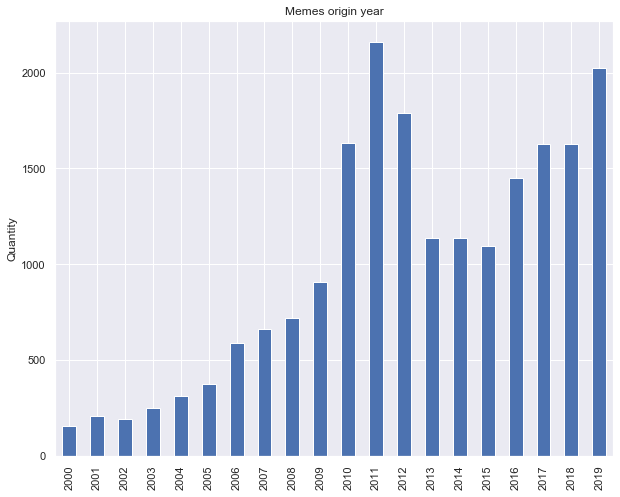

In [15]:
limited = years[(years < 2020) & (years >= 2000)].value_counts()
limited.sort_index().plot(kind='bar', title='Memes origin year', figsize=(10, 8))
plt.ylabel('Quantity')
plt.show()

## Работа с тэгами
Напишем функцию, которая будет принимать датафрейм и тэг (или несколько тэгов) и будет возвращать датафрейм, содержащий только те записи, которые включают в себя указанные тэги.

In [16]:
def find_tagged(df, *tags):
    for tag in tags:
        df = df[df.tags.str.contains(tag, na=False)]
    return df

Попробуем найти все мемы с собаками

In [17]:
dog = find_tagged(memes, 'dog')
dog = dog[dog.category=='meme']
dog.head()

,name,category,status,year,updated,views,videos,photos,comments,tags,type,about,history,other,origin,picture,scraped_at
added,,,,,,,,,,,,,,,,,
2019-12-30 16:43:17,Dogwifhat,meme,submission,2019,2020-01-01 19:21:45+00:00,7973,0,30,8,"esports, beanie, hat, dog, profile picture, ro...",NaN,Dogwifhat refers to a photograph of a Shiba In...,"On November 6th, 2019, professional Fortnite p...","Between November 20th and December 6th, a numb...",twitter,https://i.kym-cdn.com/entries/icons/original/0...,2020-01-03 04:24:28.495024+00:00
2019-12-27 21:38:21,"Ok, So Basically Im Very Smol",meme,submission,2015,2019-12-28 16:42:43+00:00,5730,0,24,4,"little, dog, puppy, pupper, interview, news, a...",image macro,NaN,"On August 10th, 2015, the Tumblr[1] account go...","Less than one month later, on September 3rd, T...",tumblr,https://i.kym-cdn.com/entries/icons/original/0...,2020-01-03 04:25:01.263050+00:00
2019-12-17 15:57:24,Cat Looking at Man Holding Dog,meme,submission,2019,2019-12-19 11:25:45+00:00,3477,0,25,2,"jealous cat, sad cat, heartbroken cat, man hol...",exploitable,Cat Looking at Man Holding Dog or Jealous Cat ...,"On August 17th, 2019, Redditor[1] angiexxn pos...","On September 22nd, 2019, Redditor[7] Jforcetea...",reddit,https://i.kym-cdn.com/entries/icons/original/0...,2020-01-03 04:28:47.989035+00:00
2019-12-06 14:23:47,"I Lied to You, Take Off Your Clothes / There I...",meme,submission,2019,2019-12-08 09:08:55+00:00,16801,0,22,16,"doge, barack obama, there is no meme, i lied t...",image macro,"I Lied to You, Take Off Your Clothes refers to...",The exact origin of the meme is unknown. The e...,"In the following days, the image has been wide...",unknown,https://i.kym-cdn.com/entries/icons/original/0...,2020-01-03 04:32:30.627018+00:00
2019-12-02 16:38:39,Cheems,meme,submission,2019,2019-12-18 15:50:15+00:00,19866,2,24,10,"ironic, doge, cheemsburger, octatracking, fede...",character,Cheems is an Ironic Doge character popular on ...,"On August 8th, 2019, Redditor Octatracking pos...","Over the following months, the character and i...",reddit,https://i.kym-cdn.com/entries/icons/original/0...,2020-01-03 04:34:29.794579+00:00


Теперь можно посмотреть, откуда у этих мемов "лапы растут". Построим гистограмму по столбцу ```origin```

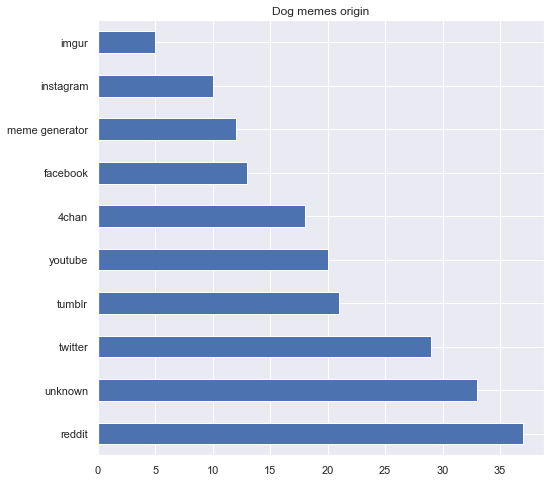

In [18]:
dogs_origin = dog.origin.value_counts().head(10)
dogs_origin.plot(kind='barh', title='Dog memes origin', figsize=(8, 8))
plt.show()

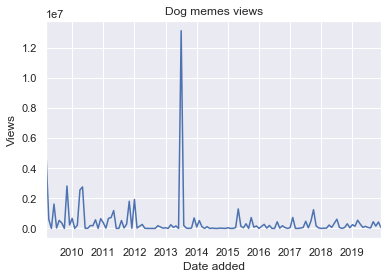

In [19]:
dog.resample('M').sum().views.plot(title='Dog memes views')
plt.xlabel('Date added')
plt.ylabel('Views')
plt.show()

По дате скачка не трудно догадаться, что за мем его вызывал.

In [20]:
dog.sort_values('views', ascending=False).head(1)

,name,category,status,year,updated,views,videos,photos,comments,tags,type,about,history,other,origin,picture,scraped_at
added,,,,,,,,,,,,,,,,,
2013-07-24 20:29:55,Doge,meme,confirmed,2013,2019-12-06 13:30:40+00:00,13122848,62,1666,918,"animal, dog, shiba inu, shibe, such doge, supe...",animal,"Doge is a slang term for ""dog"" that is primari...","The use of the misspelled word ""doge"" to refer...","On October 28th, 2010, a photo of Kabosu was s...",tumblr,https://i.kym-cdn.com/entries/icons/original/0...,2020-01-03 15:35:40.232899+00:00


Проверим, что ```find_tagged``` нормально работает с несколькими тэгами

In [21]:
find_tagged(memes, 'dog', 'japan').sort_values('views', ascending=False).head(3)

,name,category,status,year,updated,views,videos,photos,comments,tags,type,about,history,other,origin,picture,scraped_at
added,,,,,,,,,,,,,,,,,
2013-07-24 20:29:55,Doge,meme,confirmed,2013,2019-12-06 13:30:40+00:00,13122848,62,1666,918,"animal, dog, shiba inu, shibe, such doge, supe...",animal,"Doge is a slang term for ""dog"" that is primari...","The use of the misspelled word ""doge"" to refer...","On October 28th, 2010, a photo of Kabosu was s...",tumblr,https://i.kym-cdn.com/entries/icons/original/0...,2020-01-03 15:35:40.232899+00:00
2011-11-20 16:51:21,Mameshiba,subculture,confirmed,2008,2014-11-16 07:38:26+00:00,66246,25,66,20,"japan, dogs, beans, mameshiba, trivia, bean do...",NaN,NaN,The first Mameshiba cartoons were created by K...,The debut skit was uploaded via Nico Nico Doug...,sukwon kim,https://i.kym-cdn.com/entries/icons/original/0...,2020-01-03 18:53:36.428717+00:00
2019-04-18 12:13:06,Right-Hook Dog,meme,submission,2019,2019-08-04 10:59:56+00:00,30826,3,24,11,"japan, twitter, dog, shibe, shiba inu",animal,"The Right-Hook Dog (Japanese: 右フック犬, Migi Fukk...","On April 15th, 2019, Twitter user @Ninjamaaaaa...","That picture soon became to be called ""The Rig...",twitter,https://i.kym-cdn.com/entries/icons/original/0...,2020-01-03 06:17:21.338584+00:00


## Популярность
Добавим новый столбец ```popularity```. Популярностью будем считать количество просмотров в день за промежуток между моментом, когда страница была спарсена, и моментов добавления мема.  
Посмотрим на самые популярные мемы

In [22]:
memes['popularity'] = memes.scraped_at - memes.index.tz_localize('UTC')
to_days = lambda x: x.days if x.days != 0 else 1
memes['popularity'] = memes.popularity.map(to_days)
memes['popularity'] = memes.views / memes.popularity
most_popular = memes.sort_values('popularity', ascending=False).head(100)
most_popular.head()

,name,category,status,year,updated,views,videos,photos,comments,tags,type,about,history,other,origin,picture,scraped_at,popularity
added,,,,,,,,,,,,,,,,,,
2020-01-02 15:38:12,New Guy,meme,submission,2019,2020-01-02 18:43:57+00:00,33010,1,53,151,"sweetbeans99, pewdiepie, comic, fan art",character,New Guy refers to a character in a comic strip...,"On December 2nd, 2019, PewDiePie's home with M...",The comic began spreading on Twitter in late 2...,sweetbeans99,https://i.kym-cdn.com/entries/icons/original/0...,2020-01-03 04:24:01.660595+00:00,33010.000000
2019-06-20 15:14:05,Woman Yelling at a Cat,meme,confirmed,2019,2019-11-24 07:06:55+00:00,3978969,22,382,34,"cat, food, dinner, chair, the real housewives ...",exploitable,Woman Yelling at a Cat refers to a meme format...,"On December 5th, 2011, episode 14 ""Malibu Beac...","On May 2nd, Twitter user @lc28__ made the firs...",twitter,https://i.kym-cdn.com/entries/icons/original/0...,2020-01-03 05:45:51.033742+00:00,20300.862245
2019-12-23 18:23:05,Billie Eilish's 18th Birthday,event,submission,2019,2019-12-25 09:16:01+00:00,197140,0,5,72,"drake, creeps, legal, teen, ssinamonspice, ogm...",NaN,Billie Eilish's 18th Birthday refers to Americ...,NaN,NaN,unknown,https://i.kym-cdn.com/entries/icons/original/0...,2020-01-03 04:26:30.193435+00:00,19714.000000
2019-10-22 15:23:09,Video 1444,meme,submission,2019,2019-12-18 14:31:38+00:00,988801,0,31,144,"suicide, carbine, ня пока, gleb korablev, shot...",creepypasta,"Video 1444, also known simply as 1444, refers ...","On October 17th, 2019, Russian VK user Gleb Ko...","On the same day, the suicide footage was poste...",vk,https://i.kym-cdn.com/entries/icons/original/0...,2020-01-03 04:52:50.539145+00:00,13733.347222
2019-11-22 12:19:48,spritecranberry.net,meme,submission,2019,2019-12-25 09:29:54+00:00,398302,0,11,52,"sprite cranberry, dog, anus, glands, finger, v...",hoax,spritecranberry.net is a shock site that refer...,"On November 1st, 2019, an unknown user registe...","On November 2nd, 2019, Redditor macnoah6996 po...",unknown,https://i.kym-cdn.com/entries/icons/original/0...,2020-01-03 04:38:32.848980+00:00,9714.682927


Самым популярным оказался один из самых новых мемов. Меньше, чем за день он набрал 33000 просмотров. 

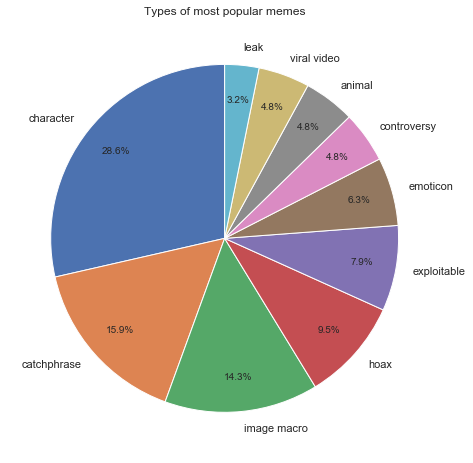

In [23]:
most_popular.type.value_counts().head(10).plot(kind='pie', startangle=90, autopct='%.1f%%', pctdistance=0.8, figsize=(8, 8))
plt.title('Types of most popular memes')
plt.axis(False)
plt.show()

Построим гистограмму самых частых тэгов среди сотни самых популярных мемов, исключая тэги, содержащие тип мема и место его происхождения. 

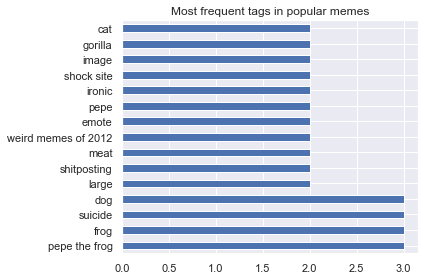

In [24]:
origins = memes.origin.values
types = memes.type.values

popular_tags = most_popular.tags.map(lambda x: x.split(', ')).sum()
popular_tags = pd.Series(popular_tags).value_counts()

popular_tags = popular_tags.drop(origins, errors='ignore')
popular_tags = popular_tags.drop(types, errors='ignore')

popular_tags.head(15).plot(kind='barh', title='Most frequent tags in popular memes')
plt.tight_layout()
plt.savefig('tags.png')
plt.show()

Взглянем, какие тэги были самыми популярными за последние 11 лет. Почистим данные от тэгов по типу __youtube, twitch, exploitable, catchphrase__.

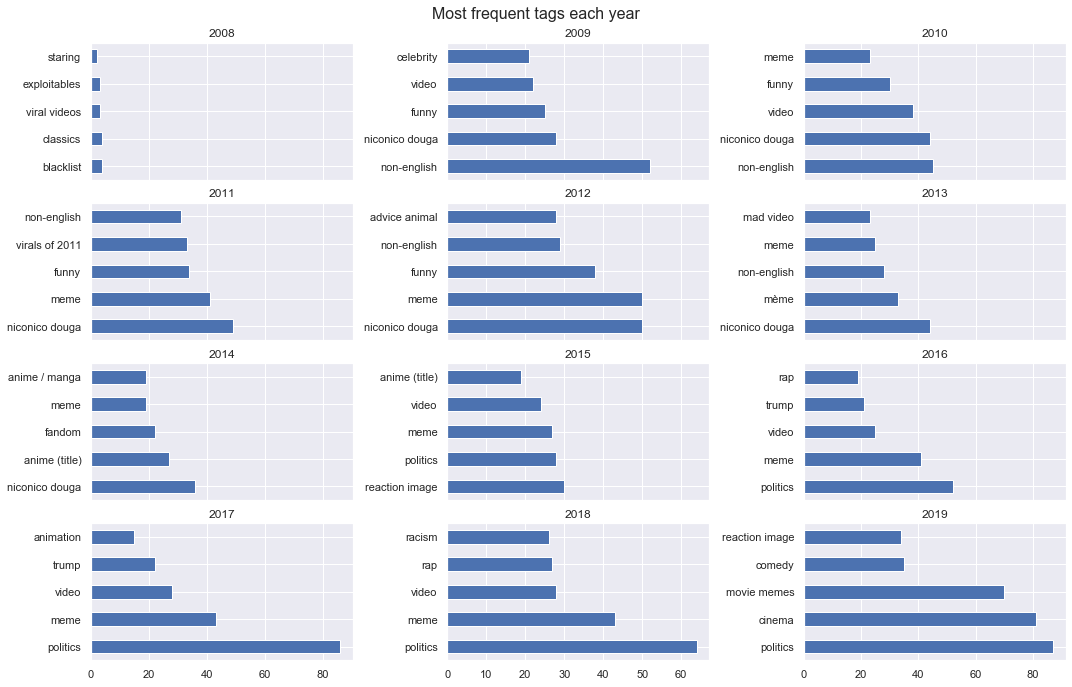

In [25]:
memes.tags.fillna('', inplace=True)
year_tags = memes.resample('Y').tags.apply(lambda x: x.sum())
year_tags = year_tags.map(lambda x: x.split(', '))
year_tags = year_tags.map(lambda x: pd.Series(x).value_counts())
years = year_tags.index.year
origins = memes.origin.values
types = memes.type.values

fig, ax = plt.subplots(4, 3, figsize=(15, 10), sharex='col')
st = fig.suptitle('Most frequent tags each year', fontsize=16)
index = 0
for i in range(4):
    for j in range(3):
        plottable = year_tags.iloc[index]
        plottable = plottable.drop(origins, errors='ignore')
        plottable = plottable.drop(types, errors='ignore')
        plottable = plottable.head(5)
        plottable.plot(kind='barh', title=years[index], ax=ax[i, j])
        index += 1
fig.tight_layout()
st.set_y(0.95)
fig.subplots_adjust(top=0.9)
plt.show()